<a href="https://colab.research.google.com/github/vigneshwarjayabal/Multi_Disease_prediction/blob/main/Multiple_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parkinsons Disease**

In [1]:
pip install lazypredict

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import lazypredict
import pickle



In [4]:
pk = pd.read_csv('/content/drive/MyDrive/parkinsons.csv')

In [5]:
pk

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
pk.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [8]:
#step1 Data Preprocesiing

pk.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [9]:
pk.duplicated().sum()

0

In [10]:
pk.set_index('name',inplace=True)

In [11]:
pk

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [12]:
pk.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [13]:
pk['status'].unique()

array([1, 0])

In [15]:
# Defining independent and dependent variable
x = pk.drop(['status'],axis=1)
y = pk['status']

In [16]:
# step 2 :Spliting the Pre-processed Dataset into Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((156, 22), (39, 22), (156,), (39,))

In [17]:
pk['status'].value_counts()

,count
status,
1,147
0,48


In [18]:
# Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 32/32 [00:02<00:00, 14.99it/s]

[LightGBM] [Info] Number of positive: 123, number of negative: 33
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.788462 -> initscore=1.315677
[LightGBM] [Info] Start training from score 1.315677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [19]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier().fit(x_train,y_train)
y_pred=model1.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.88      0.96      0.92        24

    accuracy                           0.90        39
   macro avg       0.90      0.88      0.89        39
weighted avg       0.90      0.90      0.90        39



In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)



0.8974358974358975

In [21]:
cm1 = confusion_matrix(y_test,y_pred)

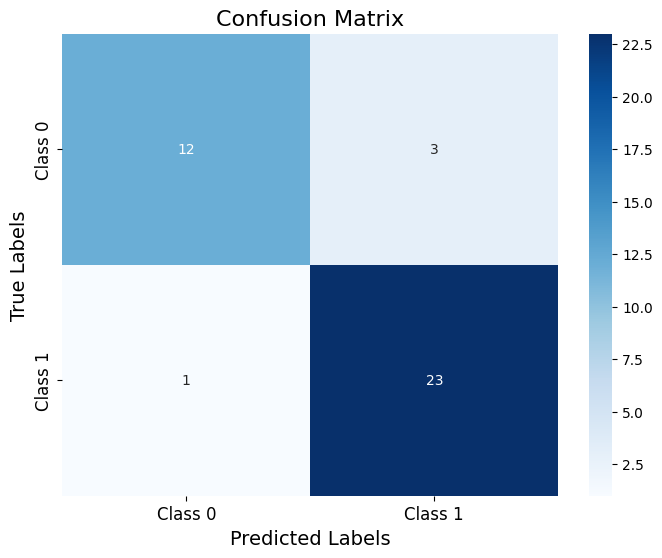

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)


plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
model1.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [24]:
pk['status'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
pickle.dump(model1,open("Parkinsons.pkl","wb"))

#**Kidney Disease**

In [26]:
kd = pd.read_csv('/content/drive/MyDrive/kidney_disease .csv')

In [27]:
kd

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.00,70.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.00,60.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [28]:
kd['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [29]:
#step 1 : data Preprocessing

kd.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
kd.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
kd['rbc'].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [ ]:
kd['pc'].unique()

array(['normal', 'abnormal', nan], dtype=object)

In [ ]:
kd['pcc'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [ ]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [30]:
continous = [ 'age', 'bp', 'sg', 'al', 'su','bgr','bu','sc','sod','pot','hemo']

In [31]:
for col in continous:
  kd[col].fillna(kd[col].mean(), inplace=True)

In [32]:
category = ['rbc', 'pc', 'pcc', 'ba','pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane']

In [33]:
for col in category:
  kd[col].fillna(method = 'bfill', inplace=True)

In [34]:
kd.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [35]:
kd.duplicated().sum()

0

In [36]:
kd

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,normal,normal,notpresent,notpresent,...,38,6000,3.9,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,...,31,7500,3.9,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.00,70.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.00,60.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [37]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

for col in category:
  kd[col] = encoder.fit_transform(kd[[col]])

In [38]:
kd['classification'] = encoder.fit_transform(kd[['classification']])

In [39]:
kd['rbc'].unique()

array([1., 0.])

In [ ]:
kd

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,1.00,1.00,0.00,0.00,...,30.00,69.00,30.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
1,1,7.00,50.00,1.02,4.00,0.00,1.00,1.00,0.00,0.00,...,24.00,53.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,62.00,80.00,1.01,2.00,3.00,1.00,1.00,0.00,0.00,...,17.00,67.00,17.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
3,3,48.00,70.00,1.00,4.00,0.00,1.00,0.00,1.00,0.00,...,18.00,59.00,17.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00
4,4,51.00,80.00,1.01,2.00,0.00,1.00,1.00,0.00,0.00,...,21.00,65.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.00,80.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,...,33.00,59.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
396,396,42.00,70.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,...,40.00,69.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
397,397,12.00,80.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,...,35.00,58.00,32.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
398,398,17.00,60.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,...,37.00,64.00,37.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [ ]:
kd['classification'].unique()

array([0., 1.])

In [40]:
kd.corr()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,1.00,-0.18,-0.24,0.61,-0.52,-0.27,0.40,0.41,-0.26,-0.12,...,0.59,0.05,0.56,-0.52,-0.48,-0.21,-0.37,-0.31,-0.27,0.84
age,-0.18,1.00,0.15,-0.18,0.11,0.21,-0.07,-0.13,0.16,0.04,...,-0.22,0.01,-0.15,0.39,0.36,0.23,0.16,0.09,0.05,-0.23
bp,-0.24,0.15,1.00,-0.18,0.15,0.20,-0.24,-0.18,0.06,0.11,...,-0.27,-0.01,-0.21,0.27,0.23,0.09,0.18,0.05,0.19,-0.29
sg,0.61,-0.18,-0.18,1.00,-0.47,-0.29,0.33,0.35,-0.29,-0.22,...,0.50,0.11,0.47,-0.37,-0.39,-0.15,-0.25,-0.27,-0.21,0.70
al,-0.52,0.11,0.15,-0.47,1.00,0.27,-0.28,-0.51,0.40,0.37,...,-0.46,-0.09,-0.45,0.48,0.38,0.24,0.33,0.44,0.28,-0.60
su,-0.27,0.21,0.20,-0.29,0.27,1.00,-0.16,-0.19,0.15,0.11,...,-0.22,-0.03,-0.21,0.29,0.47,0.25,0.08,0.13,0.07,-0.33
rbc,0.40,-0.07,-0.24,0.33,-0.28,-0.16,1.00,0.29,-0.08,-0.06,...,0.33,0.07,0.28,-0.21,-0.24,-0.16,-0.19,-0.15,-0.16,0.45
pc,0.41,-0.13,-0.18,0.35,-0.51,-0.19,0.29,1.00,-0.44,-0.28,...,0.42,0.06,0.39,-0.34,-0.28,-0.19,-0.26,-0.34,-0.26,0.43
pcc,-0.26,0.16,0.06,-0.29,0.40,0.15,-0.08,-0.44,1.00,0.28,...,-0.23,-0.08,-0.25,0.20,0.17,0.19,0.19,0.10,0.18,-0.27
ba,-0.12,0.04,0.11,-0.22,0.37,0.11,-0.06,-0.28,0.28,1.00,...,-0.17,-0.04,-0.16,0.09,0.08,0.16,0.15,0.13,0.05,-0.19


In [ ]:
#step 2: Defining independent and dependent variable and spliting preprocessed dataset into training and testing .
x = kd.iloc[:,:-1]
y = kd.iloc[:,-1]

In [ ]:
x

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.00,80.00,1.02,1.00,0.00,1.00,1.00,0.00,0.00,...,15.40,30.00,69.00,30.00,1.00,1.00,0.00,0.00,0.00,0.00
1,1,7.00,50.00,1.02,4.00,0.00,1.00,1.00,0.00,0.00,...,11.30,24.00,53.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,62.00,80.00,1.01,2.00,3.00,1.00,1.00,0.00,0.00,...,9.60,17.00,67.00,17.00,0.00,1.00,0.00,1.00,0.00,1.00
3,3,48.00,70.00,1.00,4.00,0.00,1.00,0.00,1.00,0.00,...,11.20,18.00,59.00,17.00,1.00,0.00,0.00,1.00,1.00,1.00
4,4,51.00,80.00,1.01,2.00,0.00,1.00,1.00,0.00,0.00,...,11.60,21.00,65.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.00,80.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,...,15.70,33.00,59.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00
396,396,42.00,70.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,...,16.50,40.00,69.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00
397,397,12.00,80.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,...,15.80,35.00,58.00,32.00,0.00,0.00,0.00,0.00,0.00,0.00
398,398,17.00,60.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,...,14.20,37.00,64.00,37.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
y

,classification
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
395,1.00
396,1.00
397,1.00
398,1.00


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 25), (80, 25), (320,), (80,))

In [ ]:
kd['classification'].value_counts()

,count
classification,
0.0,250
1.0,150


In [ ]:
#Step3: model bulding and runing the model
#Lazy Predict helps build a lot of basic models
# without much code and helps understand which models works better without any parameter tuning.

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████| 32/32 [00:01<00:00, 28.79it/s]

[LightGBM] [Info] Number of positive: 119, number of negative: 201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371875 -> initscore=-0.524181
[LightGBM] [Info] Start training from score -0.524181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
from sklearn.svm import SVC
model2 = SVC().fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        49
         1.0       1.00      1.00      1.00        31

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
cm2 = confusion_matrix(y_test,y_pred)

In [ ]:
cm2

array([[49,  0],
       [ 0, 31]])

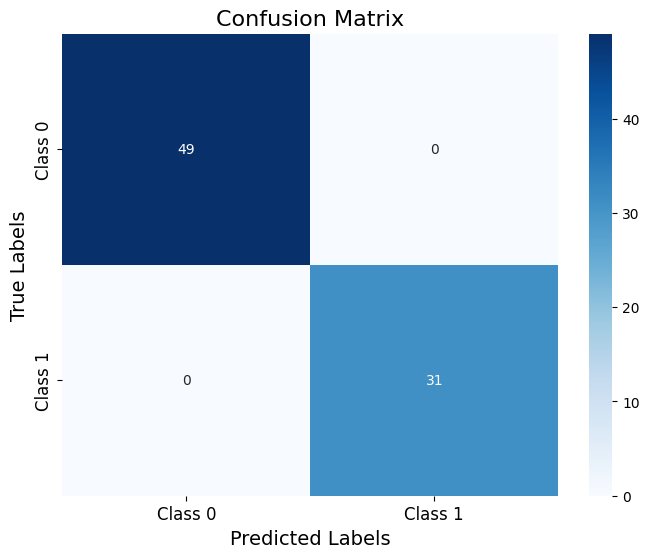

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)


plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
pickle.dump(model2,open("Kidney.pkl","wb"))

#**Liver Disease**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import lazypredict
import pickle

In [ ]:
ld = pd.read_csv('/content/drive/MyDrive/indian_liver_patient.csv')

In [ ]:
ld

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.70,0.10,187,16,18,6.80,3.30,0.90,1
1,62,Male,10.90,5.50,699,64,100,7.50,3.20,0.74,1
2,62,Male,7.30,4.10,490,60,68,7.00,3.30,0.89,1
3,58,Male,1.00,0.40,182,14,20,6.80,3.40,1.00,1
4,72,Male,3.90,2.00,195,27,59,7.30,2.40,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.50,0.10,500,20,34,5.90,1.60,0.37,2
579,40,Male,0.60,0.10,98,35,31,6.00,3.20,1.10,1
580,52,Male,0.80,0.20,245,48,49,6.40,3.20,1.00,1
581,31,Male,1.30,0.50,184,29,32,6.80,3.40,1.00,1


In [ ]:
#Step1 : Data Preprocessing

ld.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [ ]:
ld['Albumin_and_Globulin_Ratio'].fillna(ld['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

In [ ]:
ld.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [ ]:
ld.duplicated().sum()

13

In [ ]:
ld.drop_duplicates(keep = 'last',inplace=True)

In [ ]:
ld.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
ld['Gender'] = encoder.fit_transform(ld[['Gender']])

In [ ]:
ld['Gender'].unique()

array([0., 1.])

In [ ]:
ld.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.00,0.06,0.01,0.01,0.08,-0.08,-0.02,-0.20,-0.27,-0.22,-0.14
Gender,0.06,1.00,0.09,0.10,-0.02,0.08,0.08,-0.09,-0.09,-0.01,-0.08
Total_Bilirubin,0.01,0.09,1.00,0.87,0.21,0.22,0.24,-0.01,-0.22,-0.21,-0.22
Direct_Bilirubin,0.01,0.10,0.87,1.00,0.23,0.24,0.26,-0.00,-0.23,-0.20,-0.25
Alkaline_Phosphotase,0.08,-0.02,0.21,0.23,1.00,0.13,0.17,-0.03,-0.17,-0.24,-0.19
Alamine_Aminotransferase,-0.08,0.08,0.22,0.24,0.13,1.00,0.79,-0.04,-0.03,-0.01,-0.16
Aspartate_Aminotransferase,-0.02,0.08,0.24,0.26,0.17,0.79,1.00,-0.02,-0.09,-0.07,-0.15
Total_Protiens,-0.20,-0.09,-0.01,-0.00,-0.03,-0.04,-0.02,1.00,0.78,0.23,0.04
Albumin,-0.27,-0.09,-0.22,-0.23,-0.17,-0.03,-0.09,0.78,1.00,0.68,0.17
Albumin_and_Globulin_Ratio,-0.22,-0.01,-0.21,-0.20,-0.24,-0.01,-0.07,0.23,0.68,1.00,0.17


In [ ]:
#step 2: Defining independent and dependent variable and spliting preprocessed dataset into training and testing .
x = ld.iloc[:,:-1]
y = ld.iloc[:,-1]

In [ ]:
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.00,0.70,0.10,187,16,18,6.80,3.30,0.90
1,62,1.00,10.90,5.50,699,64,100,7.50,3.20,0.74
2,62,1.00,7.30,4.10,490,60,68,7.00,3.30,0.89
3,58,1.00,1.00,0.40,182,14,20,6.80,3.40,1.00
4,72,1.00,3.90,2.00,195,27,59,7.30,2.40,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1.00,0.50,0.10,500,20,34,5.90,1.60,0.37
579,40,1.00,0.60,0.10,98,35,31,6.00,3.20,1.10
580,52,1.00,0.80,0.20,245,48,49,6.40,3.20,1.00
581,31,1.00,1.30,0.50,184,29,32,6.80,3.40,1.00


In [ ]:
y

,Dataset
0,1
1,1
2,1
3,1
4,1
...,...
578,2
579,1
580,1
581,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((456, 10), (114, 10), (456,), (114,))

In [ ]:
ld['Dataset'].value_counts()

,count
Dataset,
1,406
2,164


In [ ]:
#Step3: model bulding and runing the model
#Lazy Predict helps build a lot of basic models
# without much code and helps understand which models works better without any parameter tuning.

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████| 32/32 [00:01<00:00, 25.30it/s]

[LightGBM] [Info] Number of positive: 128, number of negative: 328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 456, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.280702 -> initscore=-0.940983
[LightGBM] [Info] Start training from score -0.940983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier().fit(x_train,y_train)
y_pred = model4.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.74      0.91      0.82        78
           2       0.61      0.31      0.41        36

    accuracy                           0.72       114
   macro avg       0.68      0.61      0.61       114
weighted avg       0.70      0.72      0.69       114



In [ ]:
cm4 = confusion_matrix(y_test,y_pred)

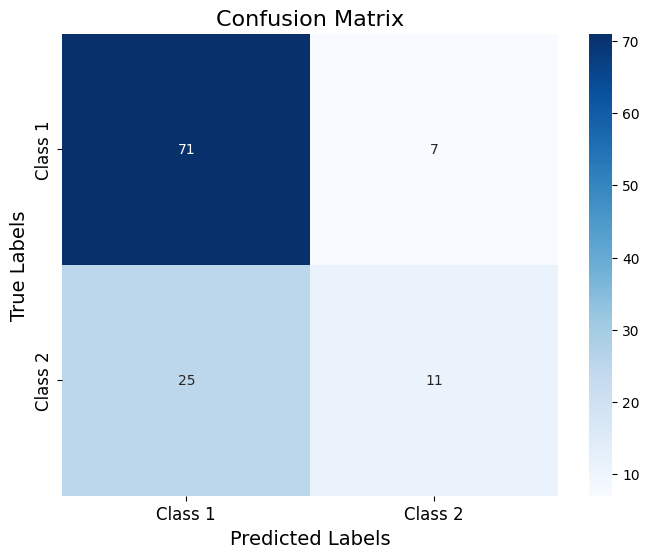

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['Class 1', 'Class 2']
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)


plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
pickle.dump(model4,open("Liver.pkl","wb"))